In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis.dihedrals import Dihedral, Ramachandran
import matplotlib.pyplot as plt
from math import floor
residues = [20, 40, 60, 80, 100, 120, 140]
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("ticks", {"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8, 'font.family': ['Liberation Sans']})

In [13]:
import numpy as np

/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


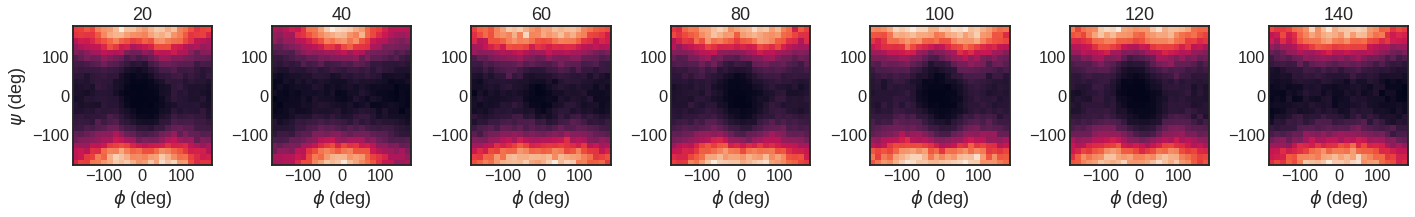

In [2]:
sim='ref'
Nbins = 24
residues = [20, 40, 60, 80, 100, 120, 140]
step=1#int(floor(len(u.trajectory)/1000))


PDB = "/data/nsalvi/hnRNPA2_HPS/cmap_test/ref/1/CG.pdb"
XTC = "/data/nsalvi/hnRNPA2_HPS/cmap_test/ref/1/nopbc.dcd"


u = mda.Universe(PDB, XTC)

fig, ax = plt.subplots(nrows=1, ncols=len(residues),figsize=(20,9))

for n, el in enumerate(residues):
    ax[n].set_aspect('equal')
    nres = str(el)
    r = u.select_atoms("resid "+nres)
    R = Ramachandran(r).run(step=step)
    ax[n].set_title(nres)

    x = R.angles[:, :, 0].flatten()
    y = R.angles[:, :, 1].flatten()

    ax[n].hist2d(x, y, bins=(Nbins, Nbins), range=[[-180,180], [-180,180]])
    ax[n].set_xlabel('$\phi$ (deg)')
    if n==0:
        ax[n].set_ylabel('$\psi$ (deg)')
    ax[n].set_xlim([-180,180])
    ax[n].set_ylim([-180,180])
    ax[n].set_aspect('equal')

plt.tight_layout()
plt.savefig("rama-"+sim+".pdf", dpi=300)

/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "
/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/analysis/dihedrals.py:324: UserWarning: Cannot determine phi and psi angles for the first or last residues
  warnings.warn("Cannot determine phi and psi angles for the first "


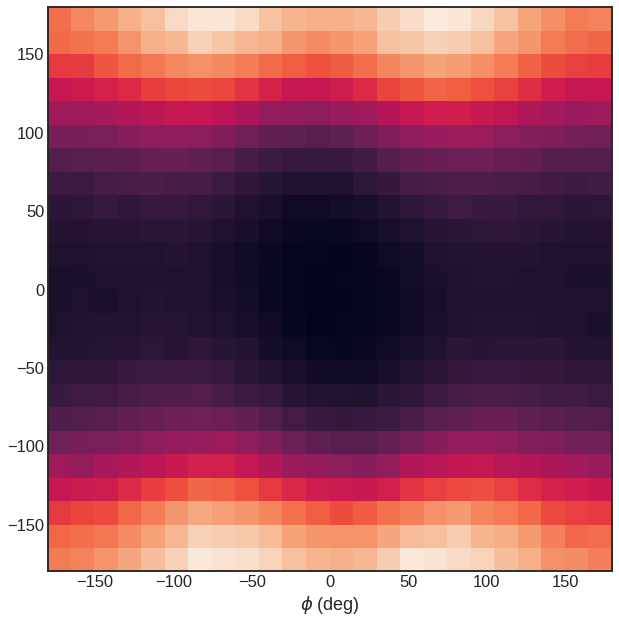

In [4]:
sim='ref'
Nbins = 24
step=10#int(floor(len(u.trajectory)/1000))


PDB = "/data/nsalvi/hnRNPA2_HPS/cmap_test/ref/1/CG.pdb"
XTC = "/data/nsalvi/hnRNPA2_HPS/cmap_test/ref/1/nopbc.dcd"


u = mda.Universe(PDB, XTC)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20,9))

ax.set_aspect('equal')
r = u.select_atoms("protein")
R = Ramachandran(r).run(step=step)

x = R.angles[:, :, 0].flatten()
y = R.angles[:, :, 1].flatten()

rp = ax.hist2d(x, y, bins=(Nbins, Nbins), range=[[-180,180], [-180,180]])
ax.set_xlabel('$\phi$ (deg)')
if n==0:
    ax.set_ylabel('$\psi$ (deg)')
ax.set_xlim([-180,180])
ax.set_ylim([-180,180])
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig("all-rama-"+sim+".pdf", dpi=300)

In [15]:
sim='ref'
Nbins = 24
step=10#int(floor(len(u.trajectory)/1000))


PDB = "/data/nsalvi/hnRNPA2_HPS/cmap_test/ref/1/CG.pdb"
XTC = "/data/nsalvi/hnRNPA2_HPS/cmap_test/ref/1/nopbc.dcd"


u = mda.Universe(PDB, XTC)

r = u.select_atoms("protein")
R = Ramachandran(r).run(step=step)

phi = R.angles[:, :, 0].flatten()
psi = R.angles[:, :, 1].flatten()

delta = int(360/Nbins)
bin_i = [n for n in range(-180, 179, delta)]

indsphi = np.digitize(phi, bin_i)
Npoints = len(psi)

all_values = []
                    
for bcounter, bi in enumerate(bin_i): #loop over psi, calculate values
    selpsi = [el for acounter, el in enumerate(psi) if indsphi[acounter]==bcounter+1]
    indspsi = np.digitize(selpsi, bin_i)
    unique, counts = np.unique(indspsi, return_counts=True)
    counts = dict(zip(unique, counts))
    pop = [counts[acounter+1]/Npoints if (acounter+1) in counts.keys() else 0 #1e-4#1e-12 
                                     for acounter, el in enumerate(bin_i)]
    all_values.append(pop)

all_values = np.array(all_values)    
all_values = all_values/sum(sum(all_values))

In [18]:
np.savetxt("all-rama-ref.out", all_values)

In [19]:
ref_rama = all_values

In [21]:
from astropy.convolution import convolve
from astropy.convolution.kernels import Gaussian1DKernel, Gaussian2DKernel

/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "
/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


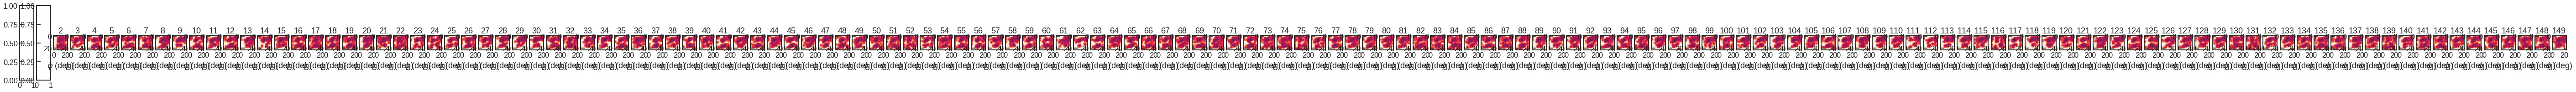

In [43]:
sim='ensemble'
Nbins = 24
residues = [20, 40, 60, 80, 100, 120, 140]
step=1#int(floor(len(u.trajectory)/1000))


XTC = '../ensemble/ensemble.dcd'
PDB = '../ensemble/18.rebuilt.pdb'

u = mda.Universe(PDB, XTC)

fig, ax = plt.subplots(nrows=1, ncols=150,figsize=(100,3))

for n in range(2, 150):# enumerate(residues):
    el = n
    ax[n].set_aspect('equal')
    nres = str(el)
    r = u.select_atoms("resid "+nres)
    R = Ramachandran(r).run(step=step)
    ax[n].set_title(nres)

    x = R.angles[:, :, 0].flatten() #phi
    y = R.angles[:, :, 1].flatten() #psi
    NpointsFM = len(x)
    
    delta = int(360/Nbins)
    bin_i = [n for n in range(-180, 179, delta)]
    
    indsFMphi = np.digitize(x, bin_i)
    
    all_values = []
    
    for bcounter, bi in enumerate(bin_i):
        selectedFMpsi = [el for acounter, el in enumerate(y) if indsFMphi[acounter]==bcounter+1]
        indsFMpsi = np.digitize(selectedFMpsi, bin_i)
        unique, counts = np.unique(indsFMpsi, return_counts=True)
        counts = dict(zip(unique, counts))
        popFM = [counts[acounter+1]/NpointsFM if (acounter+1) in counts.keys() else 1e-24
                                     for acounter, el in enumerate(bin_i)]
        all_values.append(popFM)

    #all_values = ndimage.rotate(all_values, 90)
    
    all_values = convolve(all_values, Gaussian2DKernel(x_stddev=0.75, y_stddev=0.75))
    all_values = np.abs(all_values)
    all_values = all_values/sum(sum(all_values))
    
    RT = 1.98720425864083*1e-3*298
    
    cmap = [[-RT*np.log(a/b) for a, b in zip(all_values[bc], ref_rama[bc]) ] for bc in range(Nbins)]
    
    #cmap = convolve(cmap, Gaussian2DKernel(x_stddev=0.75, y_stddev=0.75))
    
    #cmap = cmap/sum(sum(cmap))
    
    rp = ax[n].imshow(cmap, interpolation=None, vmin=-5, vmax=5)
    ax[n].set_xlabel('$\phi$ (deg)')
    if n==0:
        ax[n].set_ylabel('$\psi$ (deg)')
        fig.colorbar(rp)
    #ax[n].set_xlim([-180,180])
    #ax[n].set_ylim([-180,180])
    ax[n].set_aspect('equal')

plt.tight_layout()
plt.savefig("test.pdf", dpi=300)

In [42]:
cmap

array([[ 1.29966737e+01,  1.67863456e+01,  1.72938841e+01,
         1.74514228e+01,  1.71135425e+01,  1.66736195e+01,
         1.64296136e+01,  1.64275985e+01,  1.65486932e+01,
         1.64664559e+01,  1.60139146e+01,  1.32350688e+01,
         6.52035118e+00,  2.70792111e+00,  1.44642085e+00,
         1.09273353e+00,  1.27856409e+00,  1.23294890e+00,
         6.05473698e-01,  3.18637337e-02, -1.95446691e-01,
        -5.74403283e-02,  5.11303938e-01,  9.37871283e-01],
       [ 7.65060299e+00,  1.02483739e+01,  1.13643026e+01,
         1.20121963e+01,  1.11273088e+01,  9.94538373e+00,
         9.40356678e+00,  9.63033224e+00,  1.02069761e+01,
         1.01033104e+01,  9.25386619e+00,  7.67852354e+00,
         4.65664857e+00,  2.34331635e+00,  1.01383531e+00,
         5.64714965e-01,  7.98611189e-01,  8.79533102e-01,
         3.60119707e-01, -1.29109172e-01, -2.94397323e-01,
        -1.33426268e-01,  5.14061870e-01,  1.02832665e+00],
       [ 2.60836312e+00,  3.87629666e+00,  5.09337035e